# COMP565 Final Project
Code used for the final project for COMP565, Machine Learning in Genomics and Healthcare

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [3]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [4]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [5]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [6]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [7]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [8]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [9]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [10]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [11]:
# locus = dir_name
df00.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [12]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [13]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["locus"] = df_560["locus"].str.split("/").str[0]
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [14]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
17,chr16:19582838-19583179,0/0,216,12,228
91,chr8:68701317-68701593,0/0,178,20,198
170,chr6:11556092-11556426,1/1,50,124,174
62,chr16:26383400-26383747,1/0,78,46,124
60,chr1:56401283-56401614,1/1,32,90,122


In [15]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [16]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [17]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
213,chr8:59078453-59078800,1,84,42,126
64,chr16:66823194-66823539,1,72,68,140
159,chr5:31677425-31677762,2,52,96,148
92,chr9:101398744-101399050,0,130,18,148
145,chr4:84221709-84222004,2,54,130,184


In [18]:
y = df_560["GIAB_genotype"].to_numpy()
X = df_560.iloc[:, 2:].to_numpy()

## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [19]:
pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))

SyntaxError: invalid syntax (<ipython-input-19-893da9078440>, line 2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [21]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [22]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[0.9        0.92222222 0.97777778 0.84269663 0.87640449]


In [23]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))

[[18  1  0]
 [ 1 39  0]
 [ 3  9 41]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.80      0.97      0.88        40
           2       1.00      0.77      0.87        53

    accuracy                           0.88       112
   macro avg       0.87      0.90      0.88       112
weighted avg       0.90      0.88      0.87       112



### Using rbf (with non-linear boundary) as kernel

In [24]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)
print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.911
Accuracy of linear SVC on test set: 0.875


## DNN - Deep Neural Network

In [25]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [26]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [27]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-27-e75506c90954>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [28]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 1s - loss: 1.0580 - accuracy: 0.5625 - 666ms/epoch - 29ms/step
Epoch 2/200
23/23 - 0s - loss: 1.0312 - accuracy: 0.6295 - 25ms/epoch - 1ms/step
Epoch 3/200
23/23 - 0s - loss: 1.0055 - accuracy: 0.6786 - 33ms/epoch - 1ms/step
Epoch 4/200
23/23 - 0s - loss: 0.9809 - accuracy: 0.7321 - 30ms/epoch - 1ms/step
Epoch 5/200
23/23 - 0s - loss: 0.9557 - accuracy: 0.7009 - 31ms/epoch - 1ms/step
Epoch 6/200
23/23 - 0s - loss: 0.9298 - accuracy: 0.6830 - 31ms/epoch - 1ms/step
Epoch 7/200
23/23 - 0s - loss: 0.9017 - accuracy: 0.7143 - 33ms/epoch - 1ms/step
Epoch 8/200
23/23 - 0s - loss: 0.8698 - accuracy: 0.7433 - 31ms/epoch - 1ms/step
Epoch 9/200
23/23 - 0s - loss: 0.8360 - accuracy: 0.7768 - 30ms/epoch - 1ms/step
Epoch 10/200
23/23 - 0s - loss: 0.8017 - accuracy: 0.8393 - 26ms/epoch - 1ms/step
Epoch 11/200
23/23 - 0s - loss: 0.7658 - accuracy: 0.8058 - 30ms/epoch - 1ms/step
Epoch 12/200
23/23 - 0s - loss: 0.7317 - accuracy: 0.8080 - 30ms/epoch - 1ms/step
Epoch 13/200
23/23 - 0s

Epoch 101/200
23/23 - 0s - loss: 0.2798 - accuracy: 0.8973 - 22ms/epoch - 954us/step
Epoch 102/200
23/23 - 0s - loss: 0.2788 - accuracy: 0.8973 - 26ms/epoch - 1ms/step
Epoch 103/200
23/23 - 0s - loss: 0.2783 - accuracy: 0.8951 - 27ms/epoch - 1ms/step
Epoch 104/200
23/23 - 0s - loss: 0.2770 - accuracy: 0.8973 - 28ms/epoch - 1ms/step
Epoch 105/200
23/23 - 0s - loss: 0.2772 - accuracy: 0.8996 - 28ms/epoch - 1ms/step
Epoch 106/200
23/23 - 0s - loss: 0.2770 - accuracy: 0.8973 - 27ms/epoch - 1ms/step
Epoch 107/200
23/23 - 0s - loss: 0.2755 - accuracy: 0.8973 - 26ms/epoch - 1ms/step
Epoch 108/200
23/23 - 0s - loss: 0.2758 - accuracy: 0.8973 - 25ms/epoch - 1ms/step
Epoch 109/200
23/23 - 0s - loss: 0.2758 - accuracy: 0.8951 - 26ms/epoch - 1ms/step
Epoch 110/200
23/23 - 0s - loss: 0.2745 - accuracy: 0.8973 - 27ms/epoch - 1ms/step
Epoch 111/200
23/23 - 0s - loss: 0.2748 - accuracy: 0.8973 - 27ms/epoch - 1ms/step
Epoch 112/200
23/23 - 0s - loss: 0.2734 - accuracy: 0.8973 - 26ms/epoch - 1ms/step
Ep

Epoch 200/200
23/23 - 0s - loss: 0.2507 - accuracy: 0.8951 - 24ms/epoch - 1ms/step


In [29]:
estimator.predict(y_test)

array([1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1,
       0, 1])

In [30]:
y_test

,0/0,1/0,1/1
453,0,0,1
341,0,0,1
177,0,1,0
86,1,0,0
332,0,0,1
...,...,...,...
88,1,0,0
235,0,1,0
352,0,0,1
33,1,0,0


In [31]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

,0/0,1/0,1/1,genotype
453,0,0,1,2
341,0,0,1,2
177,0,1,0,1
86,1,0,0,0
332,0,0,1,2
...,...,...,...,...
88,1,0,0,0
235,0,1,0,1
352,0,0,1,2
33,1,0,0,0


In [32]:
y_test = y_test2["genotype"].to_numpy()

In [33]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))

[[24  2  0]
 [ 1 42  1]
 [ 0  5 37]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.86      0.95      0.90        44
           2       0.97      0.88      0.93        42

    accuracy                           0.92       112
   macro avg       0.93      0.92      0.92       112
weighted avg       0.92      0.92      0.92       112



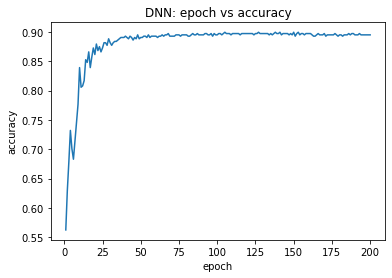

In [34]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("DNN: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

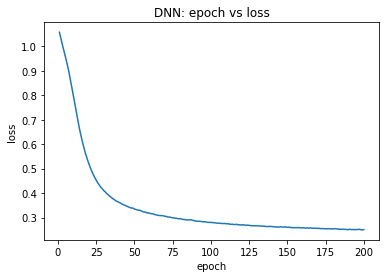

In [35]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("DNN: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [36]:
#print(history.params)
#history.history['loss']

In [37]:
from tensorflow.keras.losses import MeanSquaredError

In [38]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
model2.add(Dense(10, activation='tanh', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [39]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 1.0937 - accuracy: 0.5625
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0786 - accuracy: 0.5491
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0632 - accuracy: 0.5424
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0480 - accuracy: 0.5402
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0344 - accuracy: 0.5915
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0210 - accuracy: 0.6071
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0074 - accuracy: 0.5871
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.5804
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.5848
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9640 - accuracy: 0.5625
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8929
Epoch 84/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8951
Epoch 85/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8929
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8929
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8929
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8951
Epoch 89/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8929
Epoch 90/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8973
Epoch 91/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8973
Epoch 92/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8929
Epoch 93/200


14/14 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8951
Epoch 165/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8951
Epoch 166/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2769 - accuracy: 0.8929
Epoch 167/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.8973
Epoch 168/200
14/14 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8951
Epoch 169/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8973
Epoch 170/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8951
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8951
Epoch 172/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8973
Epoch 173/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8973
Epoc

In [40]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.29306617, 0.3348272 , 0.37210667],
       [0.3157858 , 0.33822203, 0.3459922 ],
       [0.31834358, 0.34578067, 0.33587572],
       [0.3073448 , 0.35838506, 0.33427018],
       [0.32281417, 0.34327474, 0.33391115],
       [0.31778345, 0.3456876 , 0.33652893],
       [0.31778345, 0.3456876 , 0.33652893],
       [0.3110665 , 0.3510634 , 0.3378701 ],
       [0.30341715, 0.3578665 , 0.33871645],
       [0.30298567, 0.33444402, 0.36257032],
       [0.30574074, 0.33570588, 0.35855338],
       [0.30999008, 0.34632167, 0.34368825],
       [0.31183934, 0.3507575 , 0.3374031 ],
       [0.31516293, 0.34912264, 0.33571446],
       [0.31518915, 0.3504855 , 0.3343253 ],
       [0.30505413, 0.35593322, 0.33901265],
       [0.3253528 , 0.34034812, 0.3342991 ],
       [0.31104526, 0.3517712 , 0.33718354],
       [0.3130547 , 0.34964195, 0.33730328],
       [0.3124904 , 0.34989694, 0.33761275],
       [0.3055856 , 0.33402315, 0.36039132],
       [0.31140566, 0.35410336, 0.33449093],
       [0.

In [41]:
model().evaluate(X_test, y_test)

ValueError: in user code:

    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
pred_for_val = estimator.predict(dtest_for_val_ini)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
results

In [ ]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))